# Stock Performance Tracker


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [35]:
pd.set_option("display.max_rows", None)

# plt.style.use("fivethirtyeight")

user_name_l = ["ta", "tl"]
user_combined = "user_combined"
user_name_combined_l = user_name_l + [user_combined]

index_combined = "index_combined"
index_name_l = ["vni", "vn30"]
index_name_combined_l = index_name_l + [index_combined]


## Read data


### Log table


In [3]:
log_df = pd.read_csv("./stock_data - log.csv", index_col="date", parse_dates=True)
log_df = log_df.sort_index()
log_df.tail()


,ta_amount,tl_amount,vni,vn30
date,,,,
2022-01-17,170767673,399431676,1452.84,1478.61
2022-01-18,169639788,398695481,1438.94,1477.06
2022-01-19,170623200,399849051,1442.79,1482.55
2022-01-20,171867752,402077879,1465.30,1492.81
2022-01-21,171568151,402345708,1472.89,1502.16


In [4]:
assert log_df.index.inferred_type == "datetime64"
log_df.dtypes


ta_amount      int64
tl_amount      int64
vni          float64
vn30         float64
dtype: object

### NAV chart


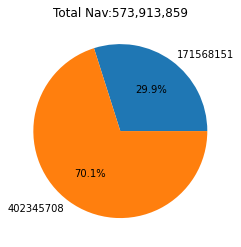

In [5]:
nav_l = [log_df[f"{user_name}_amount"].iloc[-1] for user_name in user_name_l]  # type: ignore
plt.pie(nav_l, labels=nav_l, autopct="%1.1f%%")

plt.title(f"Total Nav:{np.sum(nav_l):,}")
plt.show()


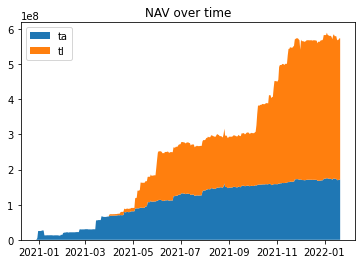

In [6]:
plt.stackplot(
    log_df.index,
    *[log_df[f"{user_name}_amount"] for user_name in user_name_l],
    labels=user_name_l,
)
plt.title("NAV over time")
plt.legend(loc="upper left")
plt.show()


### Cashflow


In [7]:
ta_cf_df = pd.read_csv(
    "./stock_data - ta_cashflow.csv",
    index_col="date",
    parse_dates=True,
)
tl_cf_df = pd.read_csv(
    "./stock_data - tl_cashflow.csv",
    index_col="date",
    parse_dates=True,
)
cf_df = pd.concat([ta_cf_df, tl_cf_df], axis=1)
assert cf_df.index.inferred_type == "datetime64"
cf_df.fillna(0, inplace=True)
cf_df


,ta_cashflow,tl_cashflow
date,,
2020-12-29,-1000000.0,0.0
2020-12-30,-4000000.0,0.0
2020-12-31,-20000000.0,0.0
2021-01-05,-1100000.0,0.0
2021-01-08,14000000.0,0.0
2021-01-29,-2500000.0,0.0
2021-02-01,-5300000.0,0.0
2021-02-22,-7900000.0,0.0
2021-03-15,-25000000.0,0.0


## Processing


### Adding diff columns


In [8]:
for user_name in user_name_l:
    log_df[f"{user_name}_diff"] = log_df[f"{user_name}_amount"].diff()
log_df.tail()


,ta_amount,tl_amount,vni,vn30,ta_diff,tl_diff
date,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0


### Remove unchanged dates from `log_df`


In [9]:
unchanged_filt = log_df[f"{user_name_l[0]}_diff"] == 0
log_df = log_df.loc[~unchanged_filt]
log_df.tail()


,ta_amount,tl_amount,vni,vn30,ta_diff,tl_diff
date,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0


### Compensating diff with cashflow


In [10]:
for user_name in user_name_l:
    log_df[f"{user_name}_diff"] = log_df[f"{user_name}_diff"].add(
        cf_df[f"{user_name}_cashflow"], fill_value=0
    )


### Adding Combined columns


In [11]:
amount_column_name_l = [f"{user_name}_amount" for user_name in user_name_l]
diff_column_name_l = [f"{user_name}_diff" for user_name in user_name_l]

log_df[f"{user_combined}_amount"] = log_df[amount_column_name_l].sum(axis=1)
log_df[f"{user_combined}_diff"] = log_df[diff_column_name_l].sum(axis=1)

log_df[index_combined] = log_df[index_name_l].mean(axis=1)
log_df.tail()


,ta_amount,tl_amount,vni,vn30,ta_diff,tl_diff,user_combined_amount,user_combined_diff,index_combined
date,,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,570199349,-9897113.0,1465.725
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,568335269,-1864080.0,1458.000
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,570472251,2136982.0,1462.670
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,573945631,3473380.0,1479.055
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,573913859,-31772.0,1487.525


### Calculating diff & aux diff


In [12]:
for user_name in user_name_combined_l:

    log_df[f"{user_name}_diff_p"] = (
        log_df[f"{user_name}_diff"] / log_df[f"{user_name}_amount"].shift()
    )

    # Replace inf values with nan in diff_p (otherwise, growth would be infinite)
    log_df[f"{user_name}_diff_p"] = log_df[f"{user_name}_diff_p"].replace(
        [np.inf, -np.inf], np.nan
    )

    log_df[f"{user_name}_aux_diff_p"] = log_df[f"{user_name}_diff_p"] + 1
log_df.tail()


,ta_amount,tl_amount,vni,vn30,ta_diff,tl_diff,user_combined_amount,user_combined_diff,index_combined,ta_diff_p,ta_aux_diff_p,tl_diff_p,tl_aux_diff_p,user_combined_diff_p,user_combined_aux_diff_p
date,,,,,,,,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,570199349,-9897113.0,1465.725,-0.016669,0.983331,-0.017229,0.982771,-0.017061,0.982939
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,568335269,-1864080.0,1458.000,-0.006605,0.993395,-0.001843,0.998157,-0.003269,0.996731
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,570472251,2136982.0,1462.670,0.005797,1.005797,0.002893,1.002893,0.003760,1.003760
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,573945631,3473380.0,1479.055,0.007294,1.007294,0.005574,1.005574,0.006089,1.006089
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,573913859,-31772.0,1487.525,-0.001743,0.998257,0.000666,1.000666,-0.000055,0.999945


### Growth


In [13]:
def get_overall_growth_df(
    log_df: pd.DataFrame,
    anchor_date: str = "2020-12-29",
) -> pd.DataFrame:
    log_df = log_df[log_df.index >= anchor_date]  # type: ignore
    df = pd.DataFrame(index=log_df.index)
    for user_name in user_name_combined_l:
        df[user_name] = log_df[f"{user_name}_aux_diff_p"].cumprod()
    for index_name in index_name_combined_l:
        df[index_name] = log_df[f"{index_name}"] / log_df[f"{index_name}"].iloc[0]  # type: ignore
    # anchor date should has growth of 1
    df.loc[anchor_date] = 1
    return df.fillna(1)  # type: ignore


In [14]:
growth_df = get_overall_growth_df(log_df, anchor_date="2021-07-01")
growth_df.head()
growth_df.tail()


,ta,tl,user_combined,vni,vn30,index_combined
date,,,,,,
2022-01-17,1.214952,1.199118,1.206041,1.025235,0.956942,0.989613
2022-01-18,1.206928,1.196908,1.202099,1.015426,0.955939,0.984397
2022-01-19,1.213924,1.200371,1.206619,1.018143,0.959492,0.987550
2022-01-20,1.222779,1.207062,1.213965,1.034028,0.966133,0.998613
2022-01-21,1.220647,1.207866,1.213898,1.039384,0.972184,1.004331


<AxesSubplot:xlabel='date'>

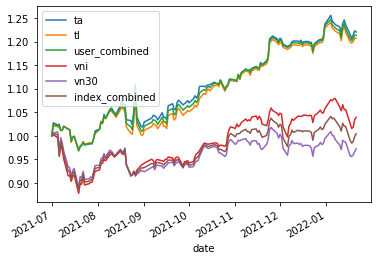

In [15]:
growth_df.plot()


### Add period info


In [16]:
log_df["Y"] = log_df.index.to_period("Y")  # type: ignore
log_df["Q"] = log_df.index.to_period("Q")  # type: ignore
log_df["M"] = log_df.index.to_period("M")  # type: ignore
log_df.tail()


,ta_amount,tl_amount,vni,vn30,ta_diff,tl_diff,user_combined_amount,user_combined_diff,index_combined,ta_diff_p,ta_aux_diff_p,tl_diff_p,tl_aux_diff_p,user_combined_diff_p,user_combined_aux_diff_p,Y,Q,M
date,,,,,,,,,,,,,,,,,,
2022-01-17,170767673,399431676,1452.84,1478.61,-2894765.0,-7002348.0,570199349,-9897113.0,1465.725,-0.016669,0.983331,-0.017229,0.982771,-0.017061,0.982939,2022,2022Q1,2022-01
2022-01-18,169639788,398695481,1438.94,1477.06,-1127885.0,-736195.0,568335269,-1864080.0,1458.000,-0.006605,0.993395,-0.001843,0.998157,-0.003269,0.996731,2022,2022Q1,2022-01
2022-01-19,170623200,399849051,1442.79,1482.55,983412.0,1153570.0,570472251,2136982.0,1462.670,0.005797,1.005797,0.002893,1.002893,0.003760,1.003760,2022,2022Q1,2022-01
2022-01-20,171867752,402077879,1465.30,1492.81,1244552.0,2228828.0,573945631,3473380.0,1479.055,0.007294,1.007294,0.005574,1.005574,0.006089,1.006089,2022,2022Q1,2022-01
2022-01-21,171568151,402345708,1472.89,1502.16,-299601.0,267829.0,573913859,-31772.0,1487.525,-0.001743,0.998257,0.000666,1.000666,-0.000055,0.999945,2022,2022Q1,2022-01


In [17]:
def get_period_df(period_symbol, log_df):
    period_l = log_df[period_symbol].unique()

    data = []
    for period in period_l:
        period_data_dict = {"period": period}
        period_filt = log_df[period_symbol] == period
        period_df = log_df.loc[period_filt]

        for user_name in user_name_combined_l:
            period_growth = period_df[f"{user_name}_aux_diff_p"].product()  # type: ignore
            period_data_dict[f"{user_name}_growth"] = period_growth - 1  # type: ignore

        for index_name in index_name_combined_l:
            index_growth = (period_df[index_name].iloc[0] - period_df[index_name].iloc[-1]) / period_df[index_name].iloc[  # type: ignore
                0
            ]
            period_data_dict[f"{index_name}_growth"] = index_growth

        data.append(period_data_dict)

    period_df = pd.DataFrame(data)
    period_df = period_df.set_index("period")
    period_df.index = period_df.index.to_series().astype(str)
    return period_df


In [18]:
monthly_df = get_period_df("M", log_df)
monthly_df


,ta_growth,tl_growth,user_combined_growth,vni_growth,vn30_growth,index_combined_growth
period,,,,,,
2020-12,-0.012086,0.000000,-0.012086,-0.011491,-0.015689,-0.013554
2021-01,-0.058015,0.000000,-0.058015,0.056994,0.039895,0.048555
2021-02,0.119198,0.000000,0.119198,-0.128400,-0.139572,-0.133971
2021-03,0.021305,0.000000,0.021305,-0.004443,-0.003700,-0.004071
2021-04,0.097828,0.005679,0.092651,-0.019151,-0.070236,-0.044799
2021-05,0.091439,0.118706,0.097430,-0.069111,-0.110502,-0.090498
2021-06,0.057973,0.065138,0.061576,-0.052901,-0.031074,-0.041426
2021-07,0.010179,0.004027,0.007063,0.075529,0.063366,0.069185
2021-08,0.008648,-0.002645,0.002953,-0.013126,0.013499,0.000833


In [120]:
def plot_growth(growth_df: pd.DataFrame, period_name: str):

    # * Draw bar chart

    x_indices = np.arange(len(growth_df.index))

    bar_name_l = user_name_l + index_name_l
    bar_count = len(bar_name_l)
    total_width = 0.8
    bar_width = total_width / bar_count

    for i, name in enumerate(bar_name_l):
        position = x_indices + i * bar_width
        plt.bar(
            position,
            growth_df[f"{name}_growth"],
            label=name,
            width=bar_width,
        )

    # move back half bar width to left most edge and then move to the middle of the bar group
    ticks = x_indices - (0.5 * bar_width) + (bar_count / 2 * bar_width)

    # * Draw line chart

    for name in [user_combined, index_combined]:
        plt.plot(
            ticks,
            growth_df[f"{name}_growth"],
            label=name,
            linestyle="--",
        )

    plt.fill_between(
        ticks,
        growth_df[f"{user_combined}_growth"],
        growth_df[f"{index_combined}_growth"],
        where=(
            growth_df[f"{user_combined}_growth"]
            >= growth_df[f"{index_combined}_growth"]
        ),
        color="green",
        interpolate=True,
        alpha=0.25,
    )

    plt.fill_between(
        ticks,
        growth_df[f"{user_combined}_growth"],
        growth_df[f"{index_combined}_growth"],
        where=(
            growth_df[f"{user_combined}_growth"] < growth_df[f"{index_combined}_growth"]
        ),
        color="red",
        interpolate=True,
        alpha=0.25,
    )

    # * Decorations

    plt.xticks(
        ticks=ticks,
        labels=growth_df.index,
        rotation=90,
    )

    plt.title(f"{period_name} growth")
    plt.xlabel(period_name)
    plt.ylabel("Growth")
    plt.legend()

    plt.grid(True)

    plt.show()


## Monthly


In [121]:
monthly_df = get_period_df("M", log_df)
monthly_df.tail()


,ta_growth,tl_growth,user_combined_growth,vni_growth,vn30_growth,index_combined_growth
period,,,,,,
2021-09,0.054943,0.052181,0.053573,-0.005552,-0.018795,-0.012395
2021-10,0.039672,0.062304,0.053041,-0.081939,-0.062781,-0.071991
2021-11,0.074182,0.066002,0.068667,-0.027429,-0.013740,-0.020405
2021-12,0.030456,0.029998,0.030117,-0.008814,0.009098,0.000333
2022-01,-0.013221,-0.017144,-0.015974,0.034538,0.036379,0.035468


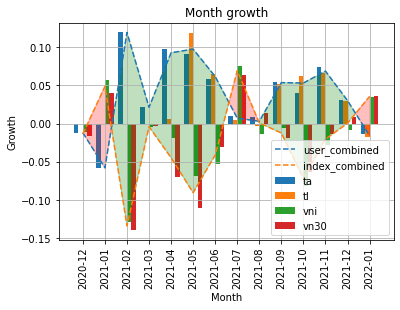

In [122]:
plot_growth(monthly_df, "Month")


## Quaterly


In [123]:
quaterly_df = get_period_df("Q", log_df)
quaterly_df.tail()


,ta_growth,tl_growth,user_combined_growth,vni_growth,vn30_growth,index_combined_growth
period,,,,,,
2021Q1,0.076729,0.000000,0.076729,-0.063339,-0.095588,-0.079255
2021Q2,0.267676,0.198343,0.272944,-0.158252,-0.246982,-0.202800
2021Q3,0.074897,0.053624,0.064147,0.052940,0.059140,0.056174
2021Q4,0.150810,0.166388,0.159242,-0.122400,-0.065112,-0.092652
2022Q1,-0.013221,-0.017144,-0.015974,0.034538,0.036379,0.035468


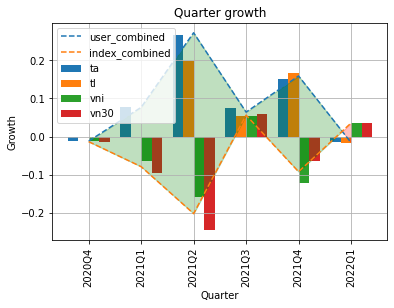

In [124]:
plot_growth(quaterly_df, "Quarter")
